**Cloud Counselage Student Data Analysis**

**Importing Dataset**

In [2]:
from IPython import get_ipython
from IPython.display import display
# %%
from google.colab import files
import pandas as pd
uploaded = files.upload()
for filename, content in uploaded.items():
  df = pd.read_excel(content)
print(df.head())
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('Data analyst Data (1).xlsx')

Saving Data analyst Data (1).xlsx to Data analyst Data (1).xlsx


<ipython-input-2-bbb6f215b31b>:8: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df = pd.read_excel(content)


  First Name           Email ID  Quantity                  Events  \
0     ANIKET     aniket@xyz.com         1  Art of Resume Building   
1  Dhanshree  dhanshree@xyz.com         1  Art of Resume Building   
2     Dhiraj     dhiraj@xyz.com         1  Art of Resume Building   
3      Pooja      pooja@xyz.com         1  Art of Resume Building   
4     Aayush     aayush@xyz.com         1  Art of Resume Building   

  Attendee Status                                       College Name  \
0       Attending  D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...   
1       Attending                   AP SHAH INSTITUTE OF TECHNOLOGY    
2       Attending       Don Bosco College of Engineering Fatorda Goa   
3       Attending           Pillai College of Engineering New Panvel   
4       Attending                               St Xavier's College    

        How did you come to know about this event?  \
0                                            Email   
1                                           

**BASIC QUESTIONS**

**1.How many unique students are included in the dataset?**

In [3]:
unique_students = df[['Email ID', 'First Name']].drop_duplicates().shape[0]
print(f"Number of unique students: {unique_students}")

Number of unique students: 2324


 **2.What is the average GPA of the students?**

In [4]:
avg_gpa = df['CGPA'].mean()
print(f"Average GPA: {avg_gpa:.2f}")

Average GPA: 8.04


**3.What is the distribution of students across different graduation years?**

[2024 2023 2025 2026]


<ipython-input-5-4148812e7a6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graduation_distribution.index, y=graduation_distribution.values, palette="viridis")


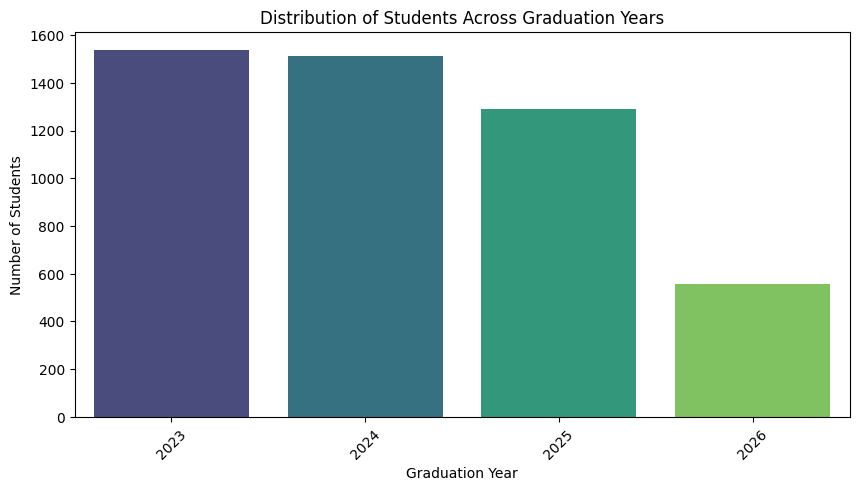

In [5]:
df.columns = df.columns.str.strip()
print(df['Year of Graduation'].unique())
graduation_distribution = df['Year of Graduation'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=graduation_distribution.index, y=graduation_distribution.values, palette="viridis")
plt.xlabel("Graduation Year")
plt.ylabel("Number of Students")
plt.title("Distribution of Students Across Graduation Years")
plt.xticks(rotation=45)
plt.show()


**4.What is the distribution of students' experience with Python programming?**

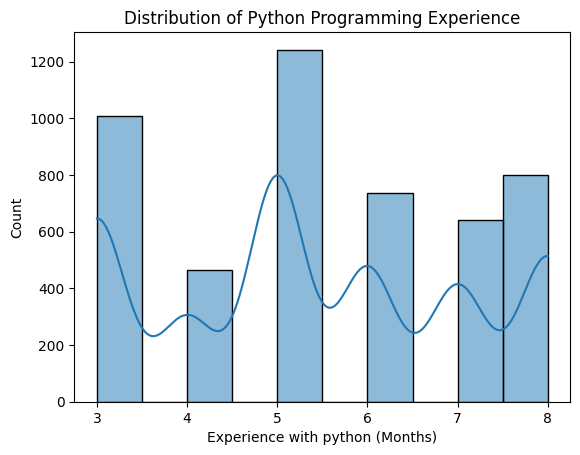

In [ ]:
sns.histplot(df['Experience with python (Months)'], bins=10, kde=True)
plt.title('Distribution of Python Programming Experience')
plt.show()

**5.What is the average family income of the students?**

In [6]:
def convert_income_to_numeric(income_str):
    if income_str == '7 Lakh+':
        return 7
    elif income_str == '5-7 Lakh':
        return 6
    elif income_str == '2-5 Lakh':
        return 3.5
    elif income_str == '0-2 Lakh':
        return 1
    else:
        return np.nan
df['Family Income Numeric'] = df['Family Income'].apply(convert_income_to_numeric)
avg_family_income = df['Family Income Numeric'].mean()
print(f"Average Family Income: {avg_family_income:.2f}")

Average Family Income: 1.29


**6.How does the GPA vary among different colleges (Show top 5 results only)**

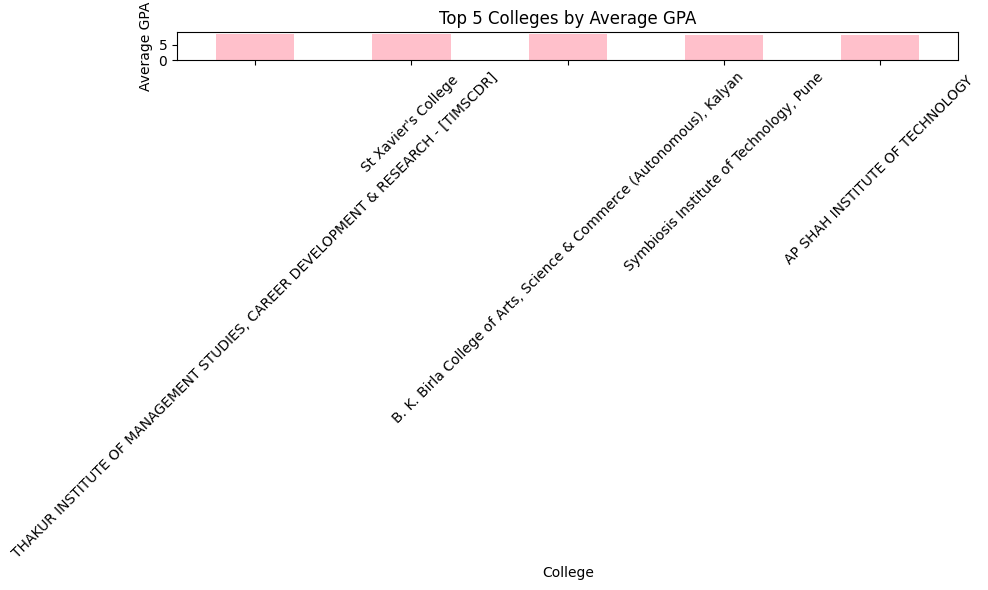

In [10]:
college_gpa = df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False)
top_colleges = college_gpa.head(5)
plt.figure(figsize=(10, 6))
top_colleges.plot(kind='bar', color='pink')
plt.title('Top 5 Colleges by Average GPA')
plt.xlabel('College')
plt.ylabel('Average GPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**7.What is the average GPA for students from each city?**

In [14]:
average_gpa_by_city = df.groupby('City')['CGPA'].mean()
for city, avg_gpa in average_gpa_by_city.items():
    print(f"Average GPA for students from {city}: {avg_gpa:.2f}")


Average GPA for students from Agartala: 7.66
Average GPA for students from Agra: 8.05
Average GPA for students from Ahemdabad: 8.19
Average GPA for students from Ajmer: 8.28
Average GPA for students from Akola: 8.02
Average GPA for students from Aligarh: 7.83
Average GPA for students from Alipore: 8.10
Average GPA for students from Almora: 8.04
Average GPA for students from Ambala: 8.02
Average GPA for students from Ambikapur: 8.00
Average GPA for students from Amer: 7.92
Average GPA for students from Amravati: 7.87
Average GPA for students from Amreli: 8.00
Average GPA for students from Amritsar: 7.95
Average GPA for students from Anantnag: 7.98
Average GPA for students from Aurangabad: 8.26
Average GPA for students from Badmi: 7.95
Average GPA for students from Baleshwar: 8.06
Average GPA for students from Ballari: 8.09
Average GPA for students from Baramula: 8.09
Average GPA for students from Barmer: 8.08
Average GPA for students from Belgavi: 8.22
Average GPA for students from Beng

**8.Can we identify any relationship between family income and GPA?**

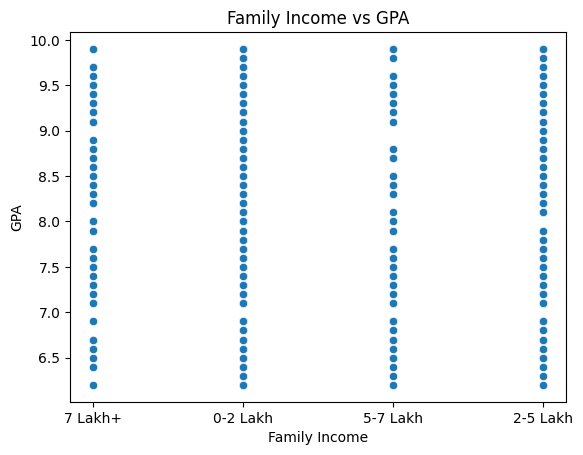

In [ ]:
sns.scatterplot(x=df['Family Income'], y=df['CGPA'])
plt.title('Family Income vs GPA')
plt.xlabel('Family Income')
plt.ylabel('GPA')
plt.show()

**MODERATE QUESTIONS**

**1.How many students are from various cities? (Using Data Visualization)**

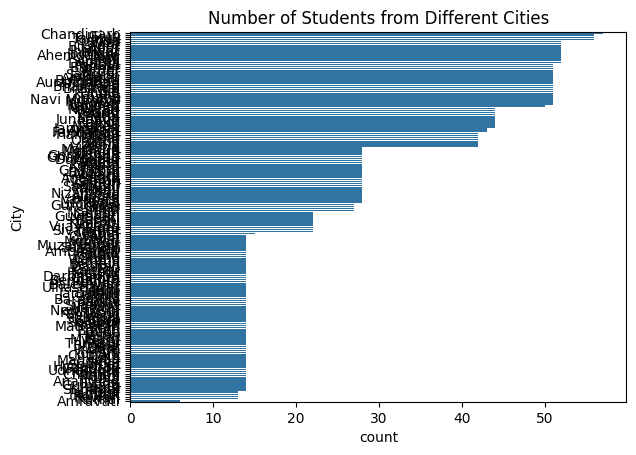

In [15]:
sns.countplot(y=df['City'], order=df['City'].value_counts().index)
plt.title('Number of Students from Different Cities')
plt.show()

**2.How does the excepted salary vary based on factors like gpa,family income,experience with python (Months) ?**

Family Income                      0
Expected salary (Lac)              0
Experience with python (Months)    0
dtype: int64


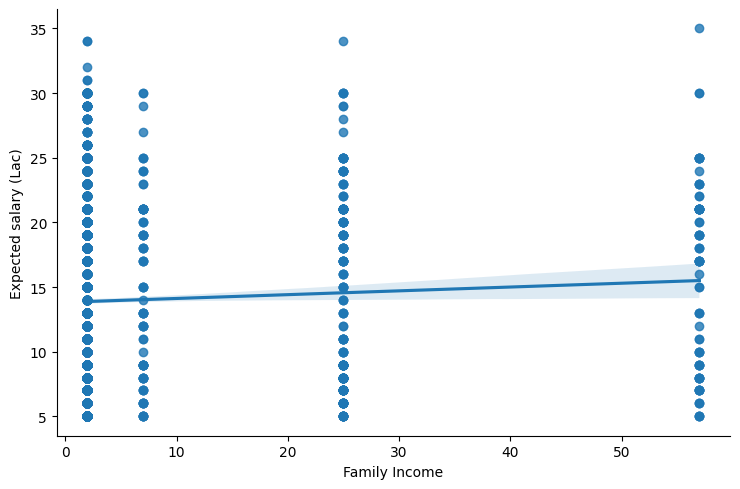

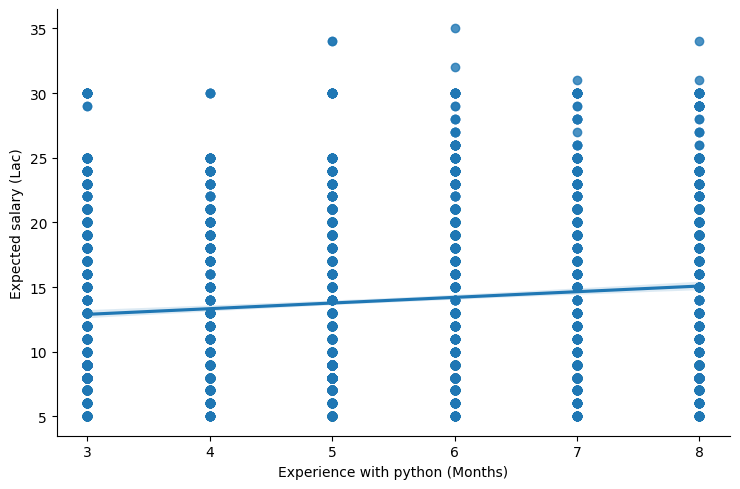

In [16]:
df.columns = df.columns.str.strip()
def clean_numeric(column):
    return df[column].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)
df['Family Income'] = clean_numeric('Family Income')
df['Expected salary (Lac)'] = clean_numeric('Expected salary (Lac)')
df['Experience with python (Months)'] = clean_numeric('Experience with python (Months)')
print(df[['Family Income', 'Expected salary (Lac)', 'Experience with python (Months)']].isnull().sum())
sns.lmplot(x='Family Income', y='Expected salary (Lac)', data=df, aspect=1.5)
sns.lmplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=df, aspect=1.5)
plt.show()


**3.Which event tend to attract more students from specific fields of study?**

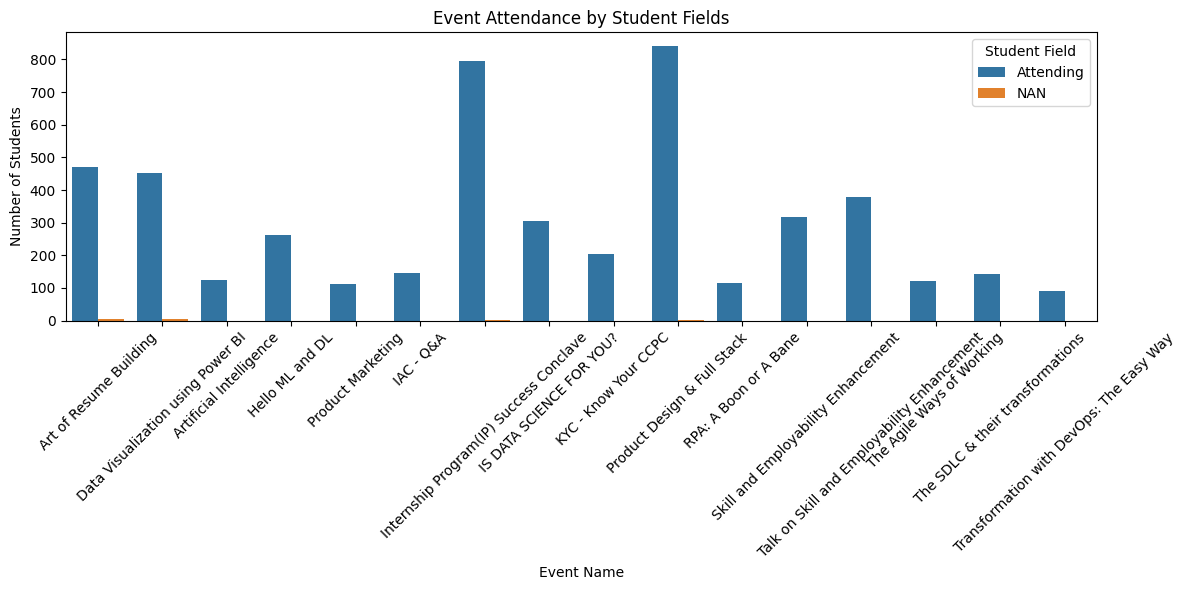

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Events', hue='Attendee Status',data=df)
plt.title('Event Attendance by Student Fields')
plt.xlabel('Event Name')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Student Field')
plt.show()

**4.Do Students in Leadership Positions Have Higher GPAs or Better Expected Salaries?**

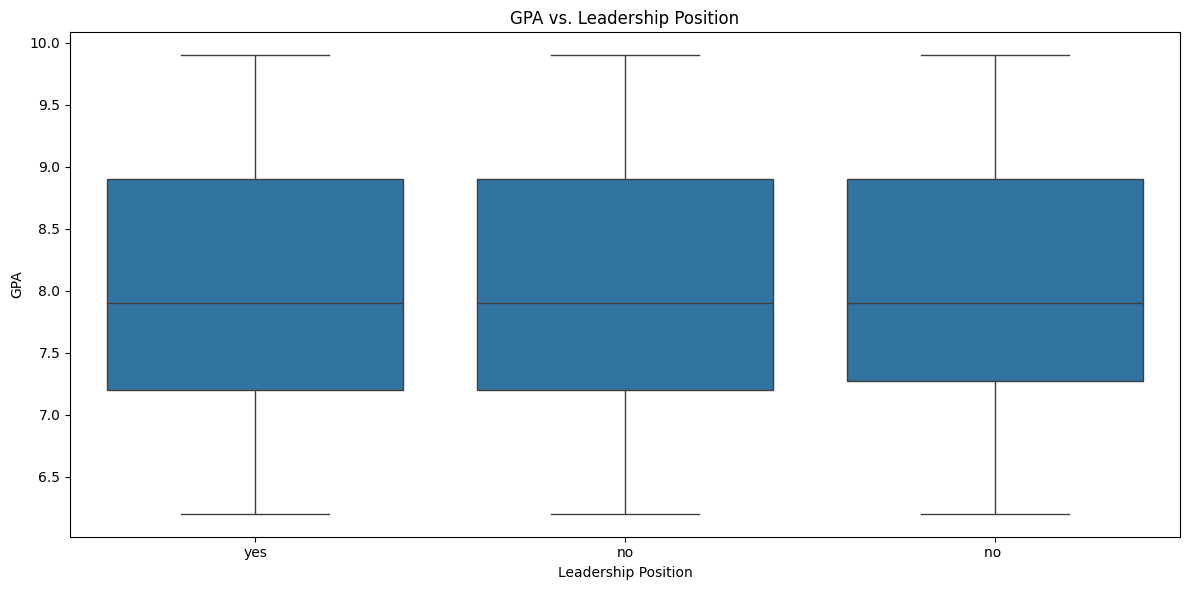

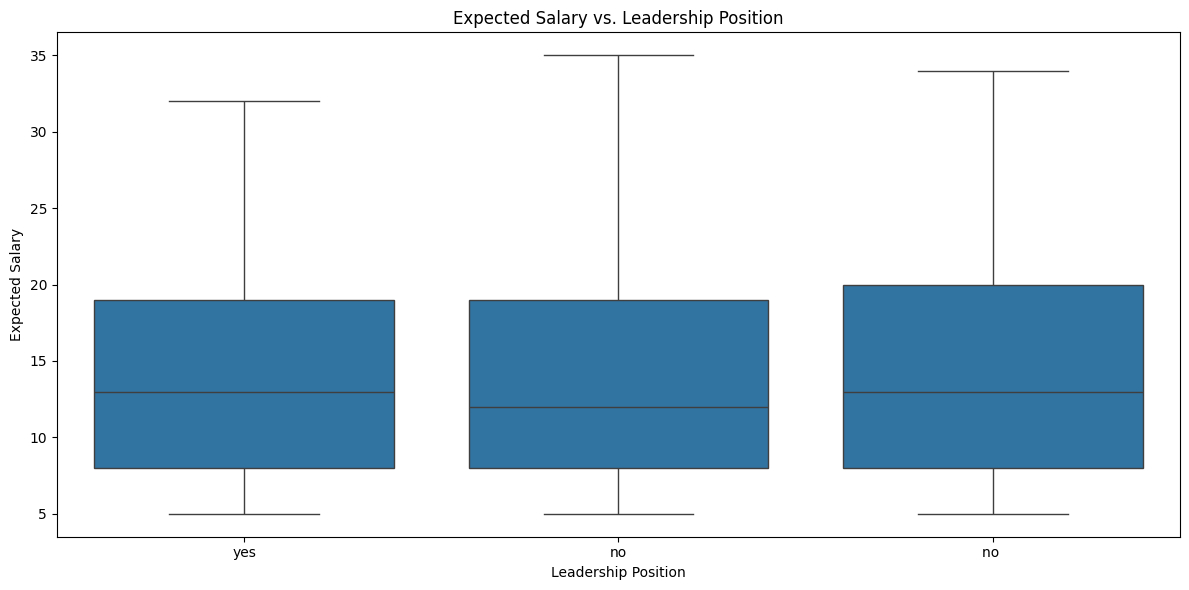

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Leadership- skills', y='CGPA', data=df)
plt.title('GPA vs. Leadership Position')
plt.xlabel('Leadership Position')
plt.ylabel('GPA')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Leadership- skills', y='Expected salary (Lac)', data=df)
plt.title('Expected Salary vs. Leadership Position')
plt.xlabel('Leadership Position')
plt.ylabel('Expected Salary')
plt.tight_layout()
plt.show()


**5.How many students are graduating by the end of 2024?**

In [27]:
graduating_by_2024 = df[df['Year of Graduation'] <= 2024]
num_graduating = len(graduating_by_2024)
print(f"Number of students graduating by the end of 2024: {num_graduating}")


Number of students graduating by the end of 2024: 3047


**6.Which promotion channel brings in more student participation for the events?**

The most successful promotion channel is 'Whatsapp' with a total attendance of 1067 students.


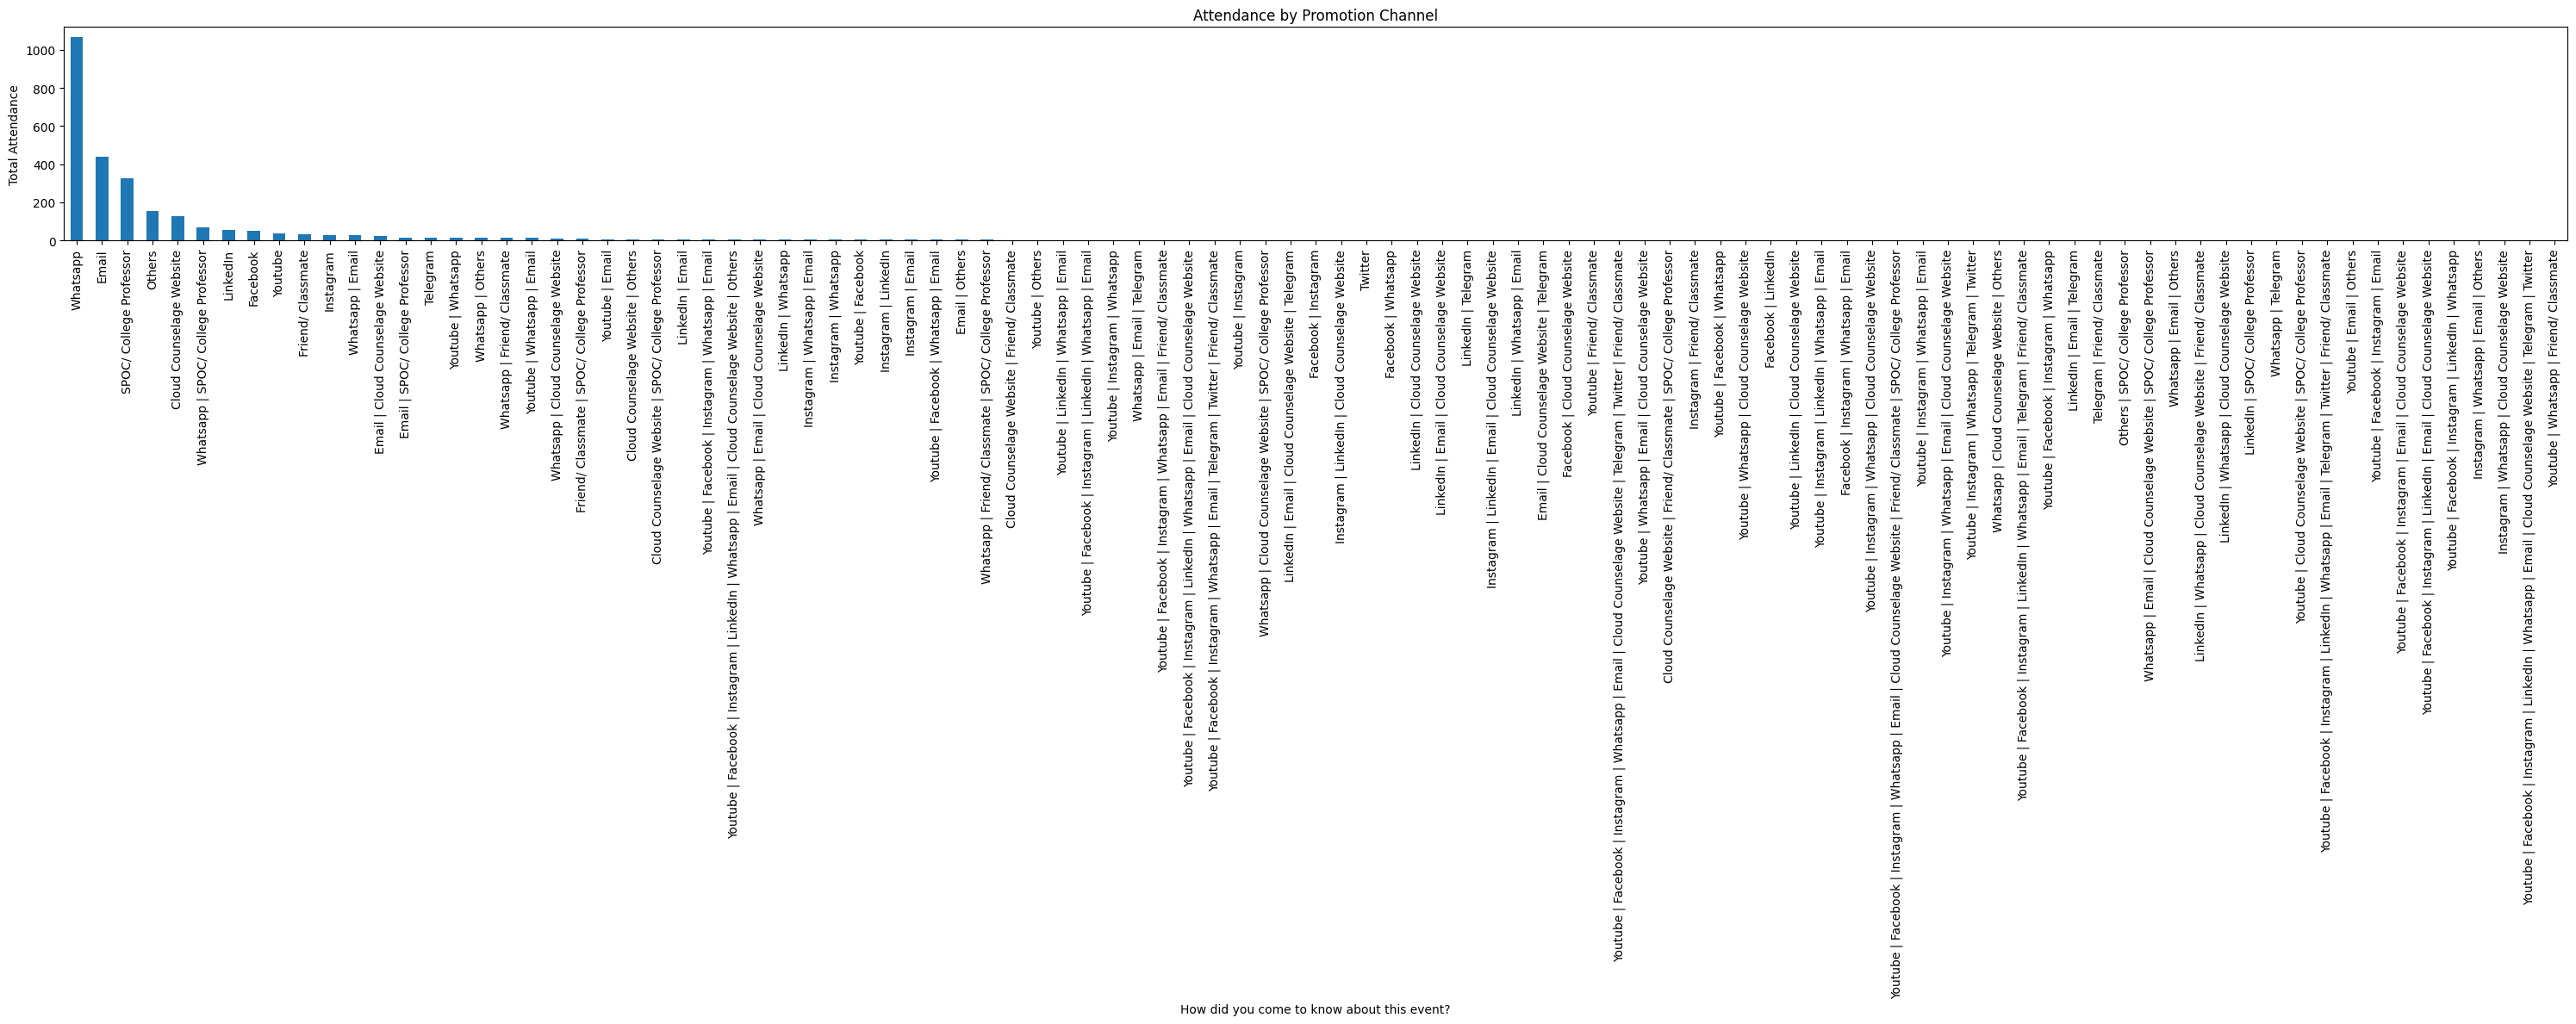

In [28]:
channel_attendance = df.groupby('How did you come to know about this event?')['Quantity'].sum()
most_successful_channel = channel_attendance.idxmax()
max_attendance = channel_attendance.max()
print(f"The most successful promotion channel is '{most_successful_channel}' with a total attendance of {max_attendance} students.")
plt.figure(figsize=(30,12))
channel_attendance.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('How did you come to know about this event?')
plt.ylabel('Total Attendance')
plt.title('Attendance by Promotion Channel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**7.Find the total number of students who attended the events related to data science (From all data science related courses)**

In [30]:
data = {
    'Email ID': ['george@xyz.com', 'cynthia@xyz.com', 'theodore@xyz.com', 'martha@xyz.com', 'chauncey@xyz.com'],
    'Events': ['Data Visualization using Power BI', 'Artificial Intelligence', 'Hello ML and DL', 'Product Marketing', 'IAC - Q&A'],
    'Attendee Status': [True, False, True, True, True]
}

# Create a DataFrame
data = pd.DataFrame(data)

# Filter for Data Science-related courses and event attendance
data_science_courses = ['Data Visualization using Power BI', 'Artificial Intelligence']
filtered_data = data[(data['Events'].isin(data_science_courses)) & (data['Attendee Status'] == True)]

# Calculate the total number of students who attended data science events
total_attendees = filtered_data['Email ID'].nunique()

print(f'Total number of students who attended data science events: {total_attendees}')

Total number of students who attended data science events: 1


**8.Those who have CGPA and More experience in language those who had high expectations for salary (Avg)**

In [34]:
filtered_data = df[(df['CGPA'] >= 9.0) & (df['Experience with python (Months)'] > 6)]
high_salary_expectations = filtered_data[filtered_data['Expected salary (Lac)'] > filtered_data['Expected salary (Lac)'].mean()]
print(f"The number of students with high CGPA and more experience in language, and high salary expectations is: {len(high_salary_expectations)}")

The number of students with high CGPA and more experience in language, and high salary expectations is: 173
